In [8]:
import numpy as np
from qiskit import Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import plot_histogram
from math import pi, acos, sqrt, sin
from qiskit.tools.visualization import circuit_drawer
import time

%matplotlib inline

In [9]:
def sprinkler(qc,q,a):
    qc.x(q[2])
    qc.x(a[0])
    qc.x(a[1])
    qc.x(a[2])
    qc.ccx(q[0],q[1],a[0])
    qc.ccx(q[1],q[2],a[1])
    qc.ccx(q[0],q[2],a[2])
    qc.mct([a[0],a[1],a[2],q[3]],a[3])
    qc.ccx(q[0],q[2],a[2])
    qc.ccx(q[1],q[2],a[1])
    qc.ccx(q[0],q[1],a[0])
    qc.x(a[2])
    qc.x(a[1])
    qc.x(a[0])
    qc.x(q[2])


In [10]:
def grover():
    q=QuantumRegister(5)
    a=QuantumRegister(5)
    qc=QuantumCircuit(q,a)
    qc.x(a[3])
    qc.h(a[3])
    sprinkler(qc,q,a)
    qc.h(a[3])
    qc.x(a[3])
    for i in range(q.size):
        qc.h(q[i])
    for i in range(q.size):
        qc.x(q[i])
    qc.mct([q[0],q[1],q[2],q[3],q[4]],a[4])
    qc.z(a[4])
    qc.mct([q[0],q[1],q[2],q[3],q[4]],a[4])
    for i in range(q.size):
        qc.x(q[i])
    qc.ry(2*pi,q[0]) 
    for i in range(q.size):
        qc.h(q[i])
    return qc

def ini(qc, q, a):
    theta0=2.0*acos(sqrt(0.55))
    theta1=2.0*acos(sqrt(0.3))
    theta2=2.0*acos(sqrt(0.7))
    qc.ry(theta0,q[0])
    qc.ry(theta1,q[1])
    qc.ry(theta2,q[2])
    qc.h(q[3])
    qc.h(q[4])
    
ggrover = grover().to_gate()

In [24]:
q=QuantumRegister(5)
a=QuantumRegister(5)
c=ClassicalRegister(2)

qc=QuantumCircuit(q,a,c)
ini(qc,q,a)
for i in range(4):
    qc.append(ggrover,range(10))
qc.measure([q[0],q[2]],c)

In [25]:
backend = Aer.get_backend('qasm_simulator')
start = time.time()

job_sim = execute(qc, backend, shots=10000)
end = time.time()
print(end - start)

result_sim = job_sim.result()

0.026810884475708008


In [26]:
counts  = result_sim.get_counts()
counts

{'00': 2045, '01': 147, '10': 4735, '11': 3073}

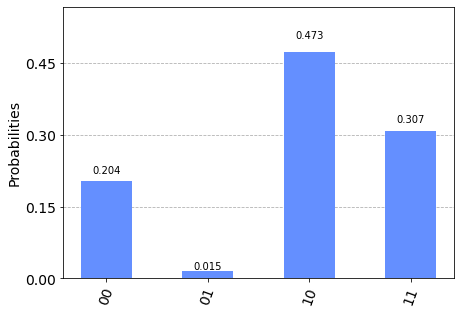

In [28]:
fig=plot_histogram(counts,sort='asc')
fig

In [29]:
fig.savefig("qmap.pdf", bbox_inches='tight')
